In [105]:
import pandas as pd
import matplotlib.pyplot as plt


In [80]:
dataset = pd.read_csv("./IMDB-Movie-Data.csv")

#to preview the first few rows of the dataset
dataset.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [81]:
#to get a general summary of the data
dataset.describe()
dataset.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

Accordding to information above, the data types are in correct order to work with

In [82]:
# checking the rows/columns that have NaN (null) values available in the dataset

nan_df = dataset[dataset.isna().any(axis = 1)]
nan_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN


#### We can see that 162 rows and two columns (Revenue (Millions), Metascore) has NaN/ null Values, so we fill then by the average of the columns

In [83]:
# filling NaN/Null values with the mean of the each column

revenue_million_mean = dataset["Revenue (Millions)"].mean()
metascore_mean = dataset["Metascore"].mean()

dataset["Revenue (Millions)"] = dataset["Revenue (Millions)"].fillna(revenue_million_mean)
dataset["Metascore"] = dataset["Metascore"].fillna(metascore_mean)


In [84]:
#doing the check again to see if there are null values
nan_df = dataset[dataset.isna().any(axis = 1)]
nan_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


#### To be sure that there are no more Nan/Null values we do the check again, we see that now the result is empty to show that all the null values are filled. Also to verify this we can do a count on all the columns and see that all hass a value of 10000, with id the number of rows we have.

In [85]:

dataset.count()

Rank                  1000
Title                 1000
Genre                 1000
Description           1000
Director              1000
Actors                1000
Year                  1000
Runtime (Minutes)     1000
Rating                1000
Votes                 1000
Revenue (Millions)    1000
Metascore             1000
dtype: int64

### Q1: Which year has the highest voting 

In [120]:
# to get the highest voting year, we do a groupby for all the years and then get the sum

highest_voting = dataset.groupby(['Year']).sum()
highest_voting

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,,,,,,
2006,25894,5317,313.5,11848758,3790.372752,2817.955128
2007,30559,6446,378.1,12949545,4638.055505,3379.895299
2008,32533,5763,352.8,14326280,5136.176376,2989.955128
2009,29928,5922,355.0,13044813,5624.085505,2916.970085
2010,35239,6668,409.6,15166939,6238.519128,3562.985043
2011,37143,7220,430.8,15169789,5514.916376,3874.925214
2012,34104,7623,443.2,18254470,6910.290000,3908.970085
2013,50617,10562,619.9,19933518,7915.589128,5328.925214
2014,50272,11220,670.1,19985162,8329.225505,5621.955128


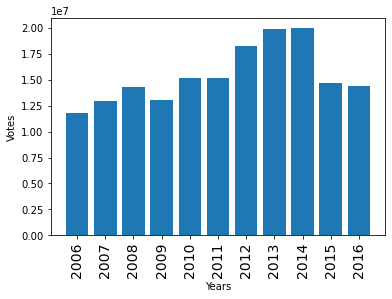

In [121]:
# bar chart of the votes against the year

years = [year for year, df in dataset.groupby('Year')]

plt.bar(years, highest_voting["Votes"])
plt.xticks(years, rotation = 'vertical', size = 14 )
plt.ylabel('Votes')
plt.xlabel('Years')
plt.show()

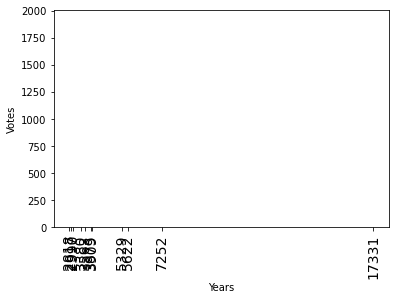

In [127]:
# bar chart of the votes against the year


plt.bar(highest_voting["Metascore"], highest_voting["Rating"])
plt.xticks(highest_voting["Metascore"], rotation = 'vertical', size = 14 )
plt.ylabel('Votes')
plt.xlabel('Years')
plt.show()

#### We can see that the year 2014 was the year with the higest votes from users